In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("./mouse_drug_data.csv")
human_data = pd.read_csv("./clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, human_data, on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(["Drug" ,"Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume_df = mean_tumor_volume.reset_index("Drug")

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,45.000000
5,Capomulin,44.266086
10,Capomulin,43.084291
15,Capomulin,42.064317
20,Capomulin,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_SE = combined_data.groupby(["Drug" ,"Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_SE_df =tumor_volume_SE.reset_index("Drug")

# Preview DataFrame
tumor_volume_SE_df.head()


,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.448593
10,Capomulin,0.702684
15,Capomulin,0.838617
20,Capomulin,0.909731


In [39]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_organized = mean_tumor_volume_df.pivot(columns="Drug", values="Tumor Volume (mm3)")
tumor_volume_SE_organized = tumor_volume_SE_df.pivot(columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_volume_organized.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


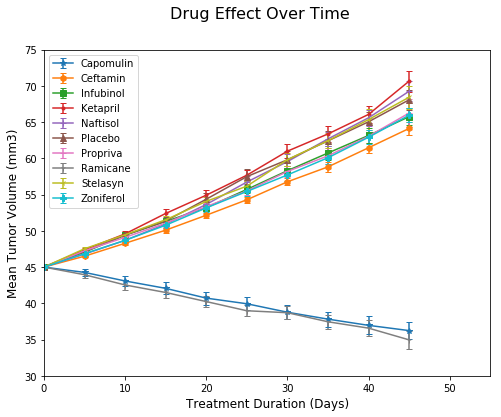

In [6]:
# this will set a cycle over the markers to change for aech subplot
markers = itertools.cycle(("*", "h", "s", ".", "+", "^", "_", "1", "3", "P")) 

#change the size of the figure for sake of clarity
plt.figure(figsize=(8,6))

#Iterate over each column and plot
for drug in mean_tumor_volume_organized.columns:
    plt.errorbar(mean_tumor_volume_organized.index, mean_tumor_volume_organized[drug], 
                 yerr=tumor_volume_SE_organized[drug], marker=next(markers), capsize = 3)

#Format the plot
plt.suptitle("Drug Effect Over Time",size = 16)
plt.xlabel("Treatment Duration (Days)",size = 12)
plt.ylabel("Mean Tumor Volume (mm3)",size = 12)
plt.legend(loc="upper left",fontsize=10)
plt.axis(xmin=0, xmax=55, ymin=30, ymax=75)


# Save the Figure
plt.savefig("Tumor data vs Time.png", dpi = 300) 

(0, 55, 30, 80)

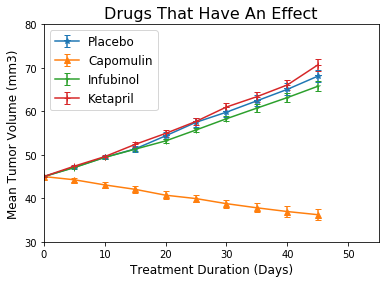

In [7]:
#Specific Data Analysis for drugs described in the methods 

plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Placebo , yerr=tumor_volume_SE_organized.Placebo,marker="*",capsize = 3)
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Capomulin , yerr=tumor_volume_SE_organized.Capomulin,marker="^",capsize = 3)
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Infubinol , yerr=tumor_volume_SE_organized.Infubinol,marker="1",capsize = 3,)
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Ketapril , yerr=tumor_volume_SE_organized.Ketapril,marker="+",capsize = 3,)


plt.title("Drugs That Have An Effect",size = 16)
plt.xlabel("Treatment Duration (Days)",size = 12)
plt.ylabel("Mean Tumor Volume (mm3)",size = 12)
plt.legend(loc="top left",fontsize=12)
plt.axis(xmin=0, xmax=55, ymin=30, ymax=80)



## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = combined_data.groupby(["Drug" ,"Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_metastatic_df = mean_metastatic.reset_index("Drug")

# Preview DataFrame
mean_metastatic_df.head()

,Drug,Metastatic Sites
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.160000
10,Capomulin,0.320000
15,Capomulin,0.375000
20,Capomulin,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_metastatic_SE = combined_data.groupby(["Drug" ,"Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
mean_metastatic_SE_df = mean_metastatic_SE.reset_index("Drug")

# Preview DataFrame
mean_metastatic_SE_df.head()

,Drug,Metastatic Sites
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.074833
10,Capomulin,0.125433
15,Capomulin,0.132048
20,Capomulin,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_organized = mean_metastatic_df.pivot(columns="Drug", values="Metastatic Sites")
mean_metastatic_SE_organized = mean_metastatic_SE_df.pivot(columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mean_metastatic_organized.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


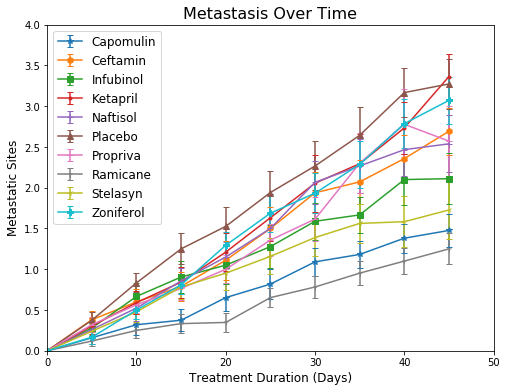

In [57]:
markers = itertools.cycle(("*", "h", "s", ".", "+", "^", "_", "1", "3", "P")) 

#change the size of the figure for sake of clarity
plt.figure(figsize=(8,6))

#Iterate over each column and plot
for drug in mean_metastatic_organized.columns:
    plt.errorbar(mean_metastatic_organized.index, mean_metastatic_organized[drug], 
                 yerr=mean_metastatic_SE_organized[drug], marker=next(markers), capsize = 3)

#Format the plot
plt.title("Metastasis Over Time",size = 16)
plt.xlabel("Treatment Duration (Days)",size = 12)
plt.ylabel("Metastatic Sites",size = 12)
plt.legend(loc="top left",fontsize=12)
plt.axis(xmin=0, xmax=50, ymin=0, ymax=4)


# Save the Figure
plt.savefig("Drug effect on Metastatic Sites.png", dpi = 300)  

(0, 50, 0, 4)

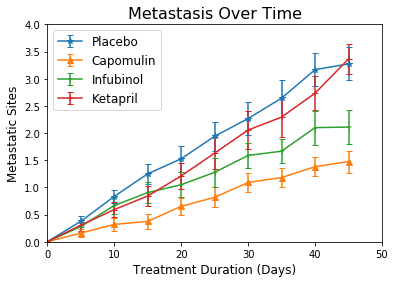

In [17]:
#Specific Data Analysis for drugs described in the methods 

plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Placebo , yerr=mean_metastatic_SE_organized.Placebo,marker="*",capsize = 3)
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Capomulin , yerr=mean_metastatic_SE_organized.Capomulin,marker="^",capsize = 3)
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Infubinol , yerr=mean_metastatic_SE_organized.Infubinol,marker="1",capsize = 3,)
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Ketapril , yerr=mean_metastatic_SE_organized.Ketapril,marker="+",capsize = 3,)

#Format Plot
plt.title("Metastasis Over Time",size = 16)
plt.xlabel("Treatment Duration (Days)",size = 12)
plt.ylabel("Metastatic Sites",size = 12)
plt.legend(loc="top left",fontsize=12)
plt.axis(xmin=0, xmax=50, ymin=0, ymax=4)

## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_data.groupby(["Drug" ,"Timepoint"])["Mouse ID"].count()


# Convert to DataFrame
mouse_count_df =mouse_count.reset_index("Drug")


# Preview DataFrame
mouse_count_df.head()

,Drug,Mouse ID
Timepoint,,
0,Capomulin,25
5,Capomulin,25
10,Capomulin,25
15,Capomulin,24
20,Capomulin,23


In [41]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_organized = mouse_count_df.pivot(columns="Drug", values="Mouse ID")

# Preview the Data Frame
mouse_count_organized

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


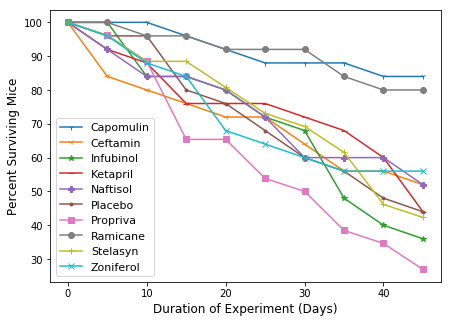

In [42]:
#Convert to percentages
mouse_count_percent = mouse_count_organized / mouse_count_organized.iloc[0] *100

#plot the figure

markers = ["1","3","*","_","P",".","s","o","+","x"]
percents= mouse_count_percent.plot(kind='line',figsize=(7,5))
for i, line in enumerate(percents.get_lines()):
    line.set_marker(markers[i])

plt.legend(loc="bottom left",fontsize=11)
plt.ylabel("Percent Surviving Mice",fontsize=12)
plt.xlabel("Duration of Experiment (Days)",fontsize=12)
#save the figure
plt.savefig("Mouse Survival Rate.png", dpi = 300) 

Text(0.5, 0, 'Duration of Experiment (Days)')

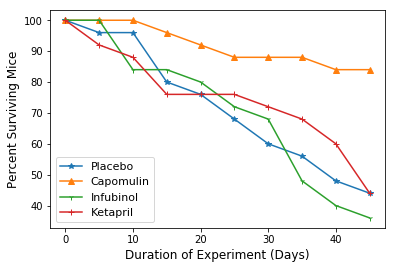

In [43]:
#Specific Data Analysis for drugs described in the methods
plt.plot(mouse_count_percent.index,mouse_count_percent.Placebo,marker="*")
plt.errorbar(mouse_count_percent.index,mouse_count_percent.Capomulin ,marker="^")
plt.errorbar(mouse_count_percent.index,mouse_count_percent.Infubinol ,marker="1")
plt.errorbar(mouse_count_percent.index,mouse_count_percent.Ketapril ,marker="+")

plt.legend(loc="bottom left",fontsize=11)
plt.ylabel("Percent Surviving Mice",fontsize=12)
plt.xlabel("Duration of Experiment (Days)",fontsize=12)

## Summary Bar Graph

In [44]:
# Calculate the percent changes for each drug
x=len(mean_tumor_volume_organized)


mean_tumor_volume_percent_change= (mean_tumor_volume_organized.iloc[x-1] -mean_tumor_volume_organized.iloc[0]) / mean_tumor_volume_organized.iloc[0] *100

# Display the data to confirm
print(mean_tumor_volume_percent_change)


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [66]:
tumor_percents = tuple(list(mean_tumor_volume_percent_change))

# Splice the data between passing and failing drugs
tumor_percents_df = pd.DataFrame({"Drug":mean_tumor_volume_percent_change.index,"%_Change":tumor_percents})
tumor_percents_df =tumor_percents_df.sort_values(by="%_Change",ascending=True)


x = len(tumor_percents_df)
failing = tumor_percents_df[2:x]
passing = tumor_percents_df[0:2]
print(passing)


        Drug   %_Change
7   Ramicane -22.320900
0  Capomulin -19.475303


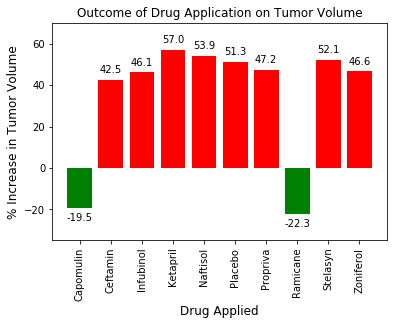

In [46]:
#Define X and Y variables 
x=mean_tumor_volume_percent_change.index
y=mean_tumor_volume_percent_change

fig, ax = plt.subplots()    

width = .8 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(x, y, width, color=np.where(y<0, 'g', 'r'))

ax.set_xticks(ind+width/2-.4)
ax.set_xticklabels(x, minor=False,rotation="vertical")
plt.title("Outcome of Drug Application on Tumor Volume")
plt.xlabel("Drug Applied",fontsize =12)
plt.ylabel("% Increase in Tumor Volume",fontsize =12)  
plt.axis(ymin=-35, ymax=70)


#ADD LABELS
def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label.
        space = spacing
        
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            
            # Invert space to place label below
            space *= -1
            
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # set offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label
                                       


# Call the function 
add_value_labels(ax)

#Save the graph
plt.savefig("% Increase in Tumor Volume.png", dpi = 300) 

Summary:
Capomulin and Ramicane where the only efficacious drugs in reducing tumor volume size.  They each also had the highest sustained survival rates of mice over the 45-day period as well as the lowest rate of metastasis as defined by the number of metstatic sites.  These would be the only two new chemical identities to go further in the pre-clinical development pipeline and potential phase 1 clinical trials.

Between the 3 drugs and control specifically outlined in the instructions only Capomulin was the therapy capable of reducing tumor size.  Capomulin was also effective at lowering the number of meatastatic sites and to a lesser extent so was Infubinol.  